<a href="https://colab.research.google.com/github/onostosia/heheh/blob/master/Cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

># Написать код на python, создающий и обучающий нейронную сеть для классификации изображений


In [ ]:
|!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow_datasets 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
#набор изображений кошек и собак
train, m = tensorflow_datasets.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteBGQ98R/cats_vs_dogs-train.tfrecord



Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


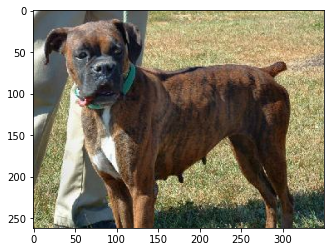

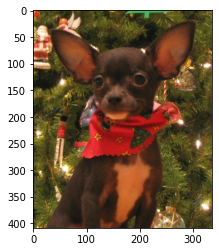

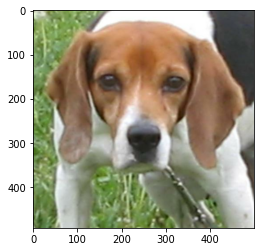

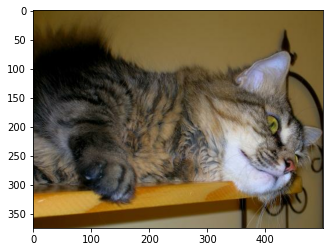

In [ ]:
for img, label in train[0].take(4):
  plt.figure()
  print(label)
  plt.imshow(img)

In [ ]:
#используем обученную модель MobileNetV2 для обработки и классификации изображений 
base_layers = tf.keras.applications.MobileNetV2(input_shape=(250, 250, 3), include_top=False)
base_layers.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
#изменяем параметры изображения(делаем его квадратным)
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (250, 250))
  img = img / 255.0
  return img, label


In [ ]:
#создание и обучение модели 
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

model.fit(train_batches, epochs=1)

1454/1454 [==============================] - 1035s 712ms/step - loss: 0.0671 - accuracy: 0.9749


Кот -0.40478313


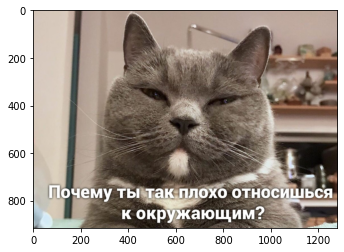

In [ ]:
img = load_img('/content/test1.jpg')
plt.figure()
plt.imshow(img)

img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

Кот -0.99556476


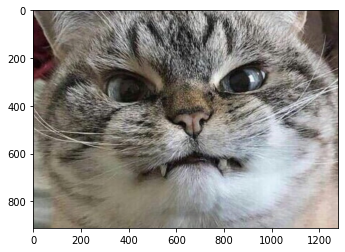

In [ ]:
img = load_img('/content/test2.jpg')
plt.figure()
plt.imshow(img)

img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

In [ ]:
img = load_img('/content/кто ты 1.jpg')
plt.figure()
plt.imshow(img)

img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

In [ ]:
img = load_img('/content/test4.jpg')
plt.figure()
plt.imshow(img)

img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

In [ ]:
files.upload()

Кот -0.39803636


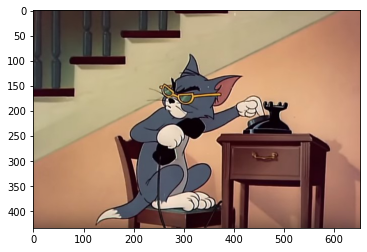

In [ ]:
img = load_img('/content/том-звонит-по-телефону-7.jpg')
plt.figure()
plt.imshow(img)

img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

In [ ]:
files.upload()

In [ ]:
files.upload()

Кот -9.298997


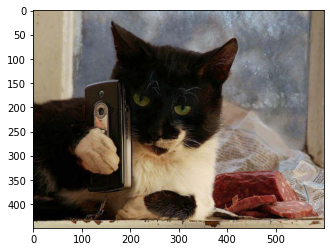

In [ ]:
img1 = load_img('/content/кот.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

Пёс 7.454461


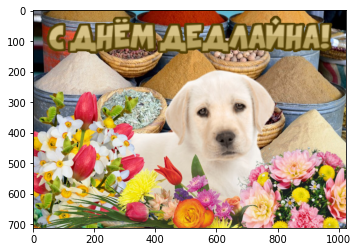

In [ ]:
img1 = load_img('/content/фф.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

Кот -0.074231595


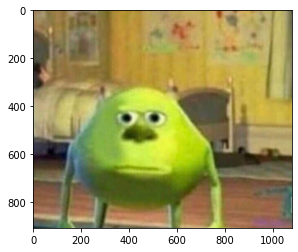

In [ ]:
img1 = load_img('/content/ффф.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

Пёс 5.4513206


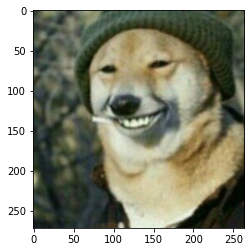

In [ ]:
img1 = load_img('/content/фффф.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

Пёс 3.265942


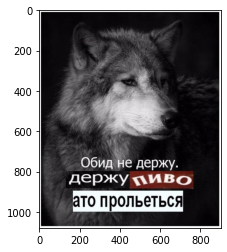

In [ ]:
img1 = load_img('/content/х.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

Пёс 3.24865


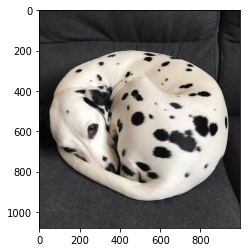

In [ ]:
img1 = load_img('/content/хх.jpg') 
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

Кот -3.5297785


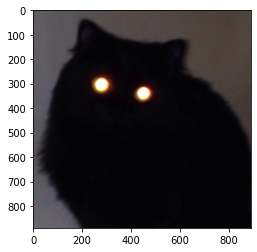

In [ ]:
img1 = load_img('/content/ххх.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

Пёс 7.635396


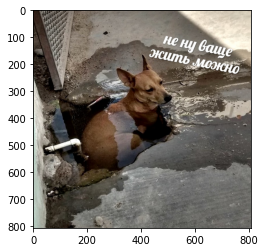

In [ ]:
img1 = load_img('/content/хххх.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

Пёс 5.0300946


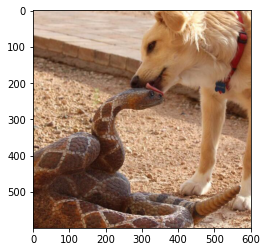

In [ ]:
img1 = load_img('/content/ххххх.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)

Пёс 0.7334454


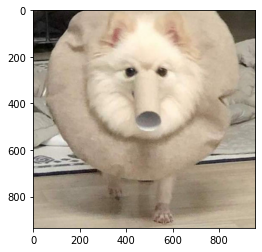

In [ ]:
img1 = load_img('/content/хххххх.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
if prediction <0.5 :
  print ('Кот' , prediction)
else:
   print ('Пёс' , prediction)